In [17]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import pyplot as plt

df = pd.read_csv("CO2_&_CARROS_1.csv", sep=';')

df.head()

,Marca,Modelo,Volume_Motor,Peso_Carro,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


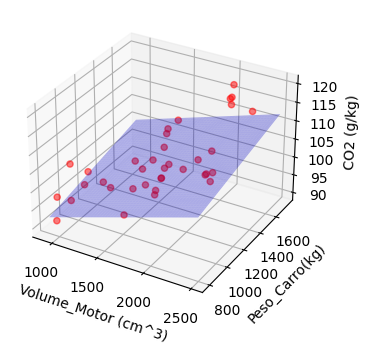

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           0.000411
Time:                        16:16:51   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6947      5.564     14.322      0.0

In [19]:
X = df[["Peso_Carro","Volume_Motor"]].values
Y = df["CO2"].values

ajuste_modelo = smf.ols(formula=' CO2 ~Volume_Motor + Peso_Carro', data=df)
equacao_ajustada = ajuste_modelo.fit()
equacao_ajustada.params

x_surf, y_surf = np.meshgrid(np.linspace(df.Volume_Motor.min(), df.Volume_Motor.max(),100), np.linspace(df.Peso_Carro.min(),df.Peso_Carro.max(),100))
onlyX = pd.DataFrame({"Volume_Motor": x_surf.ravel(), "Peso_Carro": y_surf.ravel()})
fittedY = equacao_ajustada.predict(exog = onlyX)

fittedY = np.array(fittedY)

fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df['Volume_Motor'],df['Peso_Carro'],df['CO2'], c = 'red', marker ='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color = 'blue', alpha=0.3)
ax.set_xlabel('Volume_Motor (cm^3)')
ax.set_ylabel('Peso_Carro(kg)')
ax.set_zlabel('CO2 (g/kg)')
plt.show()

X = sm.add_constant(X)

modelo = sm.OLS(Y,X).fit()
print(modelo.summary())
